# Preprocessing

##### Assign the feature names within ad.names to the columns of ad.data, and create the feature matrix and target vector while doing so.

In [27]:
# Imports
import pandas as pd     

# Import the dataset.
dataset = pd.read_csv('../datasets/ads/ad.data')

# Assign the feature names to the dataset using the .names file.
with open('../datasets/ads/adNames.txt', 'r') as file:
    feature_names = [line.split(':')[0] for line in file.readlines()]
    
# Create the feature matrix by dropping the last column (which is the target
# variable column), and assign the names to the feature matrix.
feature_matrix = dataset.drop(['ad.'], axis=1)
feature_matrix.columns = feature_names

# Create the target vector by taking the last entry of the dataset and encode
# the target vector.
target_vector = dataset['ad.'].map({'ad.': 1, 'nonad.': 0})

# Create the named dataset; the dataset with named features and including the 
# target_vector. exp_df is meant only to use to export the data; no other
# operations should be done on this dataframe.
exp_df = feature_matrix
exp_df['ads'] = target_vector

# Export the full_df
# exp_df.to_csv('full_df.csv')


C:\Users\Quang\AppData\Local\Temp\ipykernel_21372\2390612365.py:5: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('../datasets/ads/ad.data')


##### Clean the data; note that missing values are listed as "?" because whoever put together this dataset is a moron.

C:\Users\Quang\AppData\Local\Temp\ipykernel_21372\2912961893.py:27: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Quang\AppData\Local\Temp\ipykernel_21372\2912961893.py:35: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


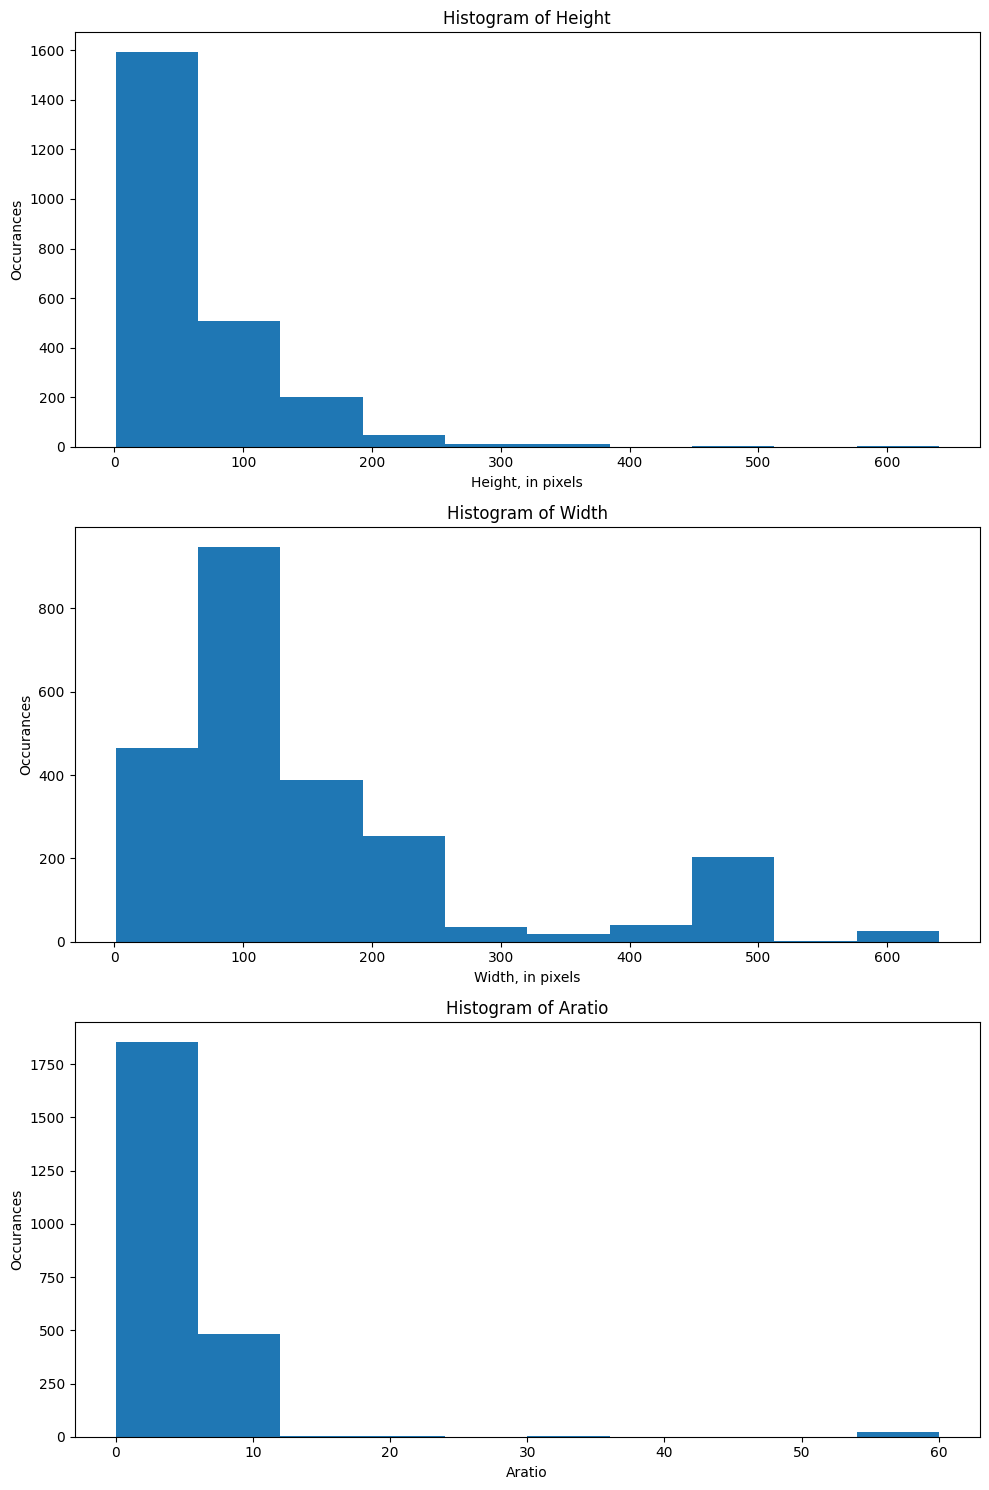

In [28]:
################################################################################
# Find missing values
################################################################################

# Locate all non-numeric values and remove them.
numeric_df = exp_df.apply(pd.to_numeric, errors='coerce')

# Plot a histogram of all the continuous variables.
import numpy as np
import matplotlib.pyplot as plt

# Height uncleaned histogram
plt.figure(1, figsize=(10,15))
plt.subplot(3, 1, 1)
plt.hist(numeric_df['height'])
plt.xlabel('Height, in pixels')
plt.ylabel('Occurances')
plt.title('Histogram of Height')
plt.tight_layout()

# Width uncleaned histogram
plt.subplot(3, 1, 2)
plt.hist(numeric_df['width'])
plt.xlabel('Width, in pixels')
plt.ylabel('Occurances')
plt.title('Histogram of Width')
plt.tight_layout()

# Aratio uncleaned histogram
plt.subplot(3, 1, 3)
plt.hist(numeric_df['aratio'])
plt.xlabel('Aratio')
plt.ylabel('Occurances')
plt.title('Histogram of Aratio')
plt.tight_layout()

C:\Users\Quang\AppData\Local\Temp\ipykernel_21372\877909593.py:60: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Quang\AppData\Local\Temp\ipykernel_21372\877909593.py:68: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


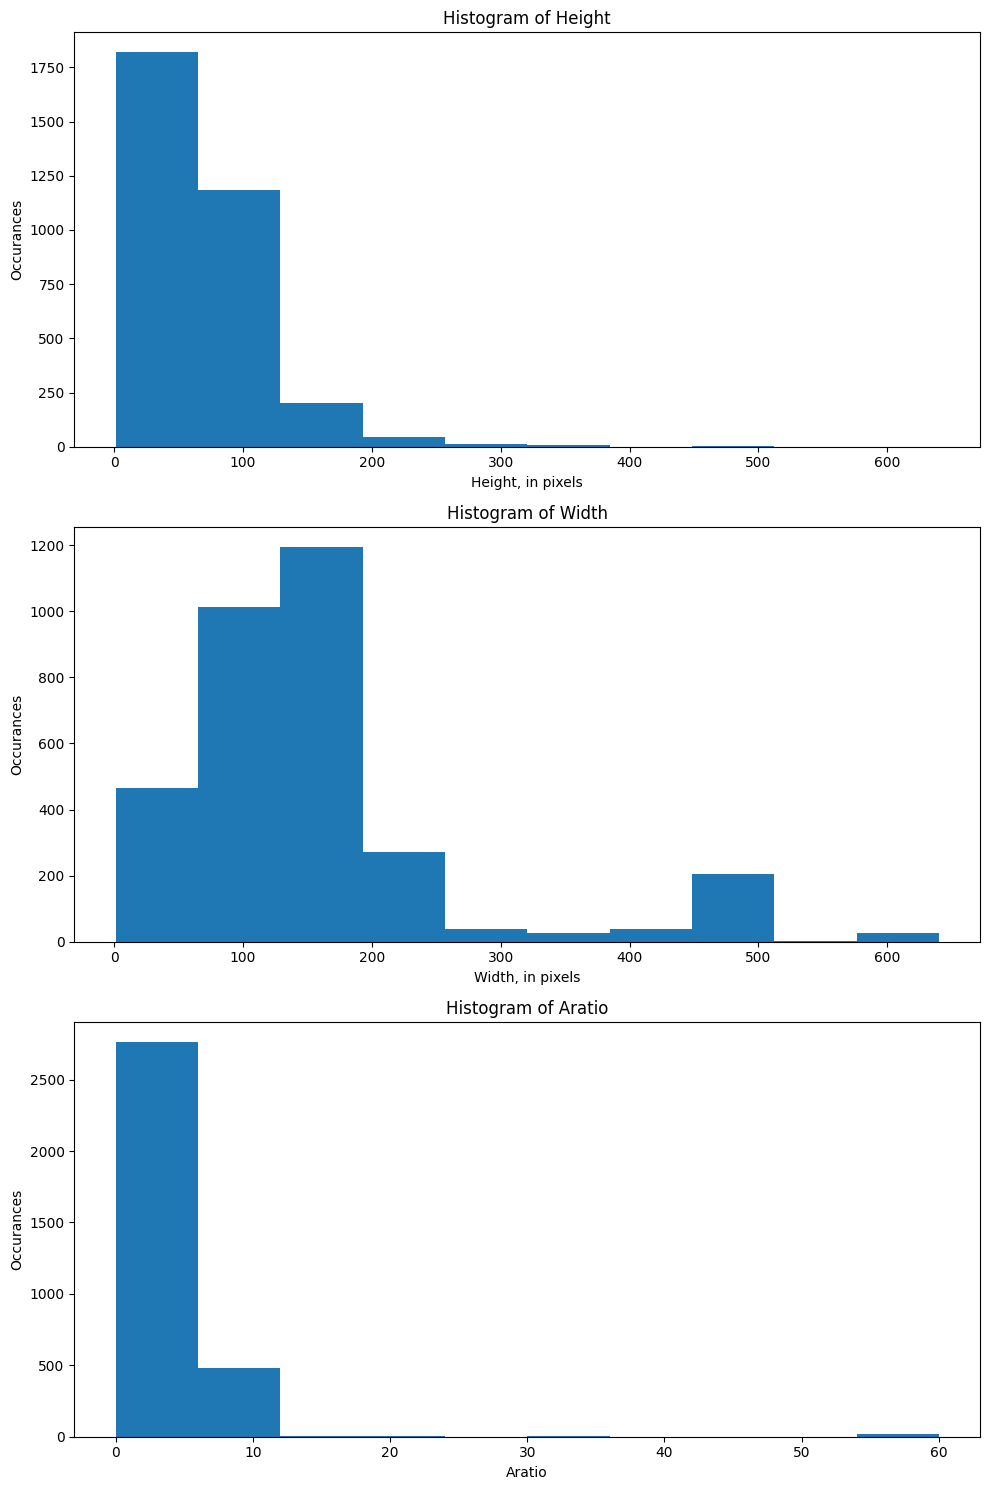

In [29]:
# Locate all columns with missing values.
missings = numeric_df.loc[:, numeric_df.isnull().any()]

################################################################################
# Use KNN imputation to fill in the missing values.
################################################################################
from sklearn.impute import KNNImputer
from sklearn.preprocessing import *

# TODO
# Test different scalers
# Use RobustScaler to avoid pruning outliers, since we can't easily determine 
# if they're actually outliers.
scaler = RobustScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(numeric_df), columns=numeric_df.columns)

# TODO
# Test different n_neighbors; sqrt(n) works relatively well.
# Use some percent of the data as the number of neighbors for the imputer.
knn_imputer = KNNImputer(copy=False, n_neighbors = round(np.sqrt(numeric_df.shape[0])))

# Scale and impute the dataset.
scaled_and_imputed_nd = knn_imputer.fit_transform(data_scaled)

# Unscale the dataset
unscaled_and_imputed_nd = scaler.inverse_transform(scaled_and_imputed_nd)
unscaled_and_imputed_df = pd.DataFrame(unscaled_and_imputed_nd)

# Post process the "aratio" feature by rounding all values >= 0.5, and flooring
# the rest.
unscaled_and_imputed_df[3] = unscaled_and_imputed_df[3].apply(round)

# Append ads to feature names
feature_names.append('ad.')

# Apply the feature names to the dataframe, again.
unscaled_and_imputed_df.columns = feature_names

# Save the above under clean_df
clean_df = unscaled_and_imputed_df
clean_df.to_csv('clean_df.csv')

# Plot the histograms again, this time of the cleaned values

# Height uncleaned histogram
plt.figure(2, figsize=(10,15))
plt.subplot(3, 1, 1)
plt.hist(clean_df['height'])
plt.xlabel('Height, in pixels')
plt.ylabel('Occurances')
plt.title('Histogram of Height')
plt.tight_layout()

# Width uncleaned histogram
plt.subplot(3, 1, 2)
plt.hist(clean_df['width'])
plt.xlabel('Width, in pixels')
plt.ylabel('Occurances')
plt.title('Histogram of Width')
plt.tight_layout()

# Aratio uncleaned histogram
plt.subplot(3, 1, 3)
plt.hist(clean_df['aratio'])
plt.xlabel('Aratio')
plt.ylabel('Occurances')
plt.title('Histogram of Aratio')
plt.tight_layout()


##### Conduct EDA

<Axes: xlabel='ad.'>

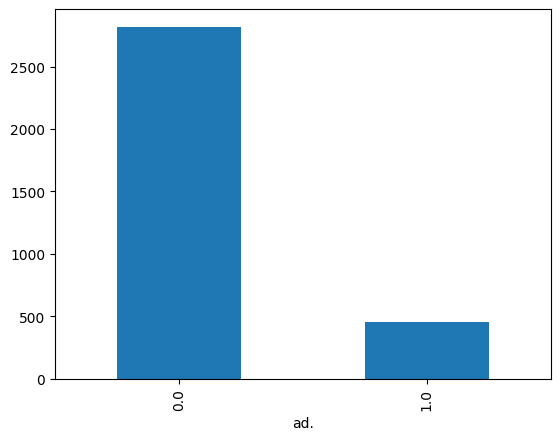

In [30]:
# Imports
import numpy as np
from sklearn.feature_selection import chi2
#STEP 1: intial understanding of the clean dataset

#target variable- image that is going to be classfied as ad or non-ad
#this shows the class distribution of the target variable
clean_df['ad.'].value_counts().plot(kind='bar')
#there is a imbalance between ad/ non-ad need to find a way to decrease class imbalance 

In [31]:
#STEP 2: Data quality assessment 
#-skipping for now since you did most of the cleaning already but we can come back to this step later 

In [32]:
#STEP 3: find features that have strong correlation with target variable

# Calculate Pearson correlation for continuous variables
from scipy.stats import pearsonr
# Select the three continuous variables
continuous_vars = clean_df[['height', 'width', 'aratio']]
# Using the corr() method to get a correlation matrix
correlation_matrix = continuous_vars.corr(method='pearson')
results = {}

for col in continuous_vars:
    corr, p_value = pearsonr(clean_df[col], clean_df['ad.'])
    results[col] = {'correlation': corr, 'p-value': p_value}

print(results)



{'height': {'correlation': 0.0100962238140325, 'p-value': 0.5633710327360877}, 'width': {'correlation': 0.5489777153440746, 'p-value': 1.8822904224625754e-257}, 'aratio': {'correlation': 0.13131711442543625, 'p-value': 4.411593802670419e-14}}


In [33]:
#Using Chi-squared test to assess asociations between binary features and target feature
from scipy.stats import chi2_contingency

chi2_results = {}
# Exclude the first four columns and the target column
for col in clean_df.columns[4:]:  # Start from the 5th column
    if col != 'ad.':  # Exclude the target variable itself
        contingency_table = pd.crosstab(clean_df[col], clean_df['ad.'])
        chi2, p, _, _ = chi2_contingency(contingency_table)
        chi2_results[col] = chi2  # Store the Chi-squared statistic

# Sort features by Chi-squared statistic
sorted_chi2_results = sorted(chi2_results.items(), key=lambda x: x[1], reverse=True)

# Print the top 30 features with the strongest correlation
top_30_chi2_results = sorted_chi2_results[:40]  # Get the top 30 features
for feature, chi2_value in top_30_chi2_results:
    print(f"{feature}: Chi-squared = {chi2_value:.4f}")

ancurl*com: Chi-squared = 1085.6134
url*ads: Chi-squared = 886.2597
ancurl*click: Chi-squared = 846.8578
alt*click: Chi-squared = 646.6715
ancurl*redirect: Chi-squared = 633.3237
ancurl*ng: Chi-squared = 618.3402
alt*click+here: Chi-squared = 615.3102
alt*here: Chi-squared = 593.8869
ancurl*adid: Chi-squared = 533.5903
ancurl*type: Chi-squared = 533.5903
ancurl*event: Chi-squared = 475.3352
ancurl*ng+type: Chi-squared = 468.8835
ancurl*runid: Chi-squared = 468.8835
ancurl*event+ng: Chi-squared = 468.8835
ancurl*type+click: Chi-squared = 468.8835
ancurl*profileid: Chi-squared = 468.8835
ancurl*2f: Chi-squared = 462.4361
ancurl*redirect+http: Chi-squared = 455.9930
ancurl*http+2f: Chi-squared = 455.9930
ancurl*http+www: Chi-squared = 444.4478
alt*for: Chi-squared = 364.4912
ancurl*2f+2fwww: Chi-squared = 308.9901
ancurl*2fwww: Chi-squared = 308.9901
alt*here+for: Chi-squared = 294.6246
ancurl*familyid: Chi-squared = 292.7183
ancurl*groupid: Chi-squared = 292.7183
ancurl*tagvalues: Chi-sq

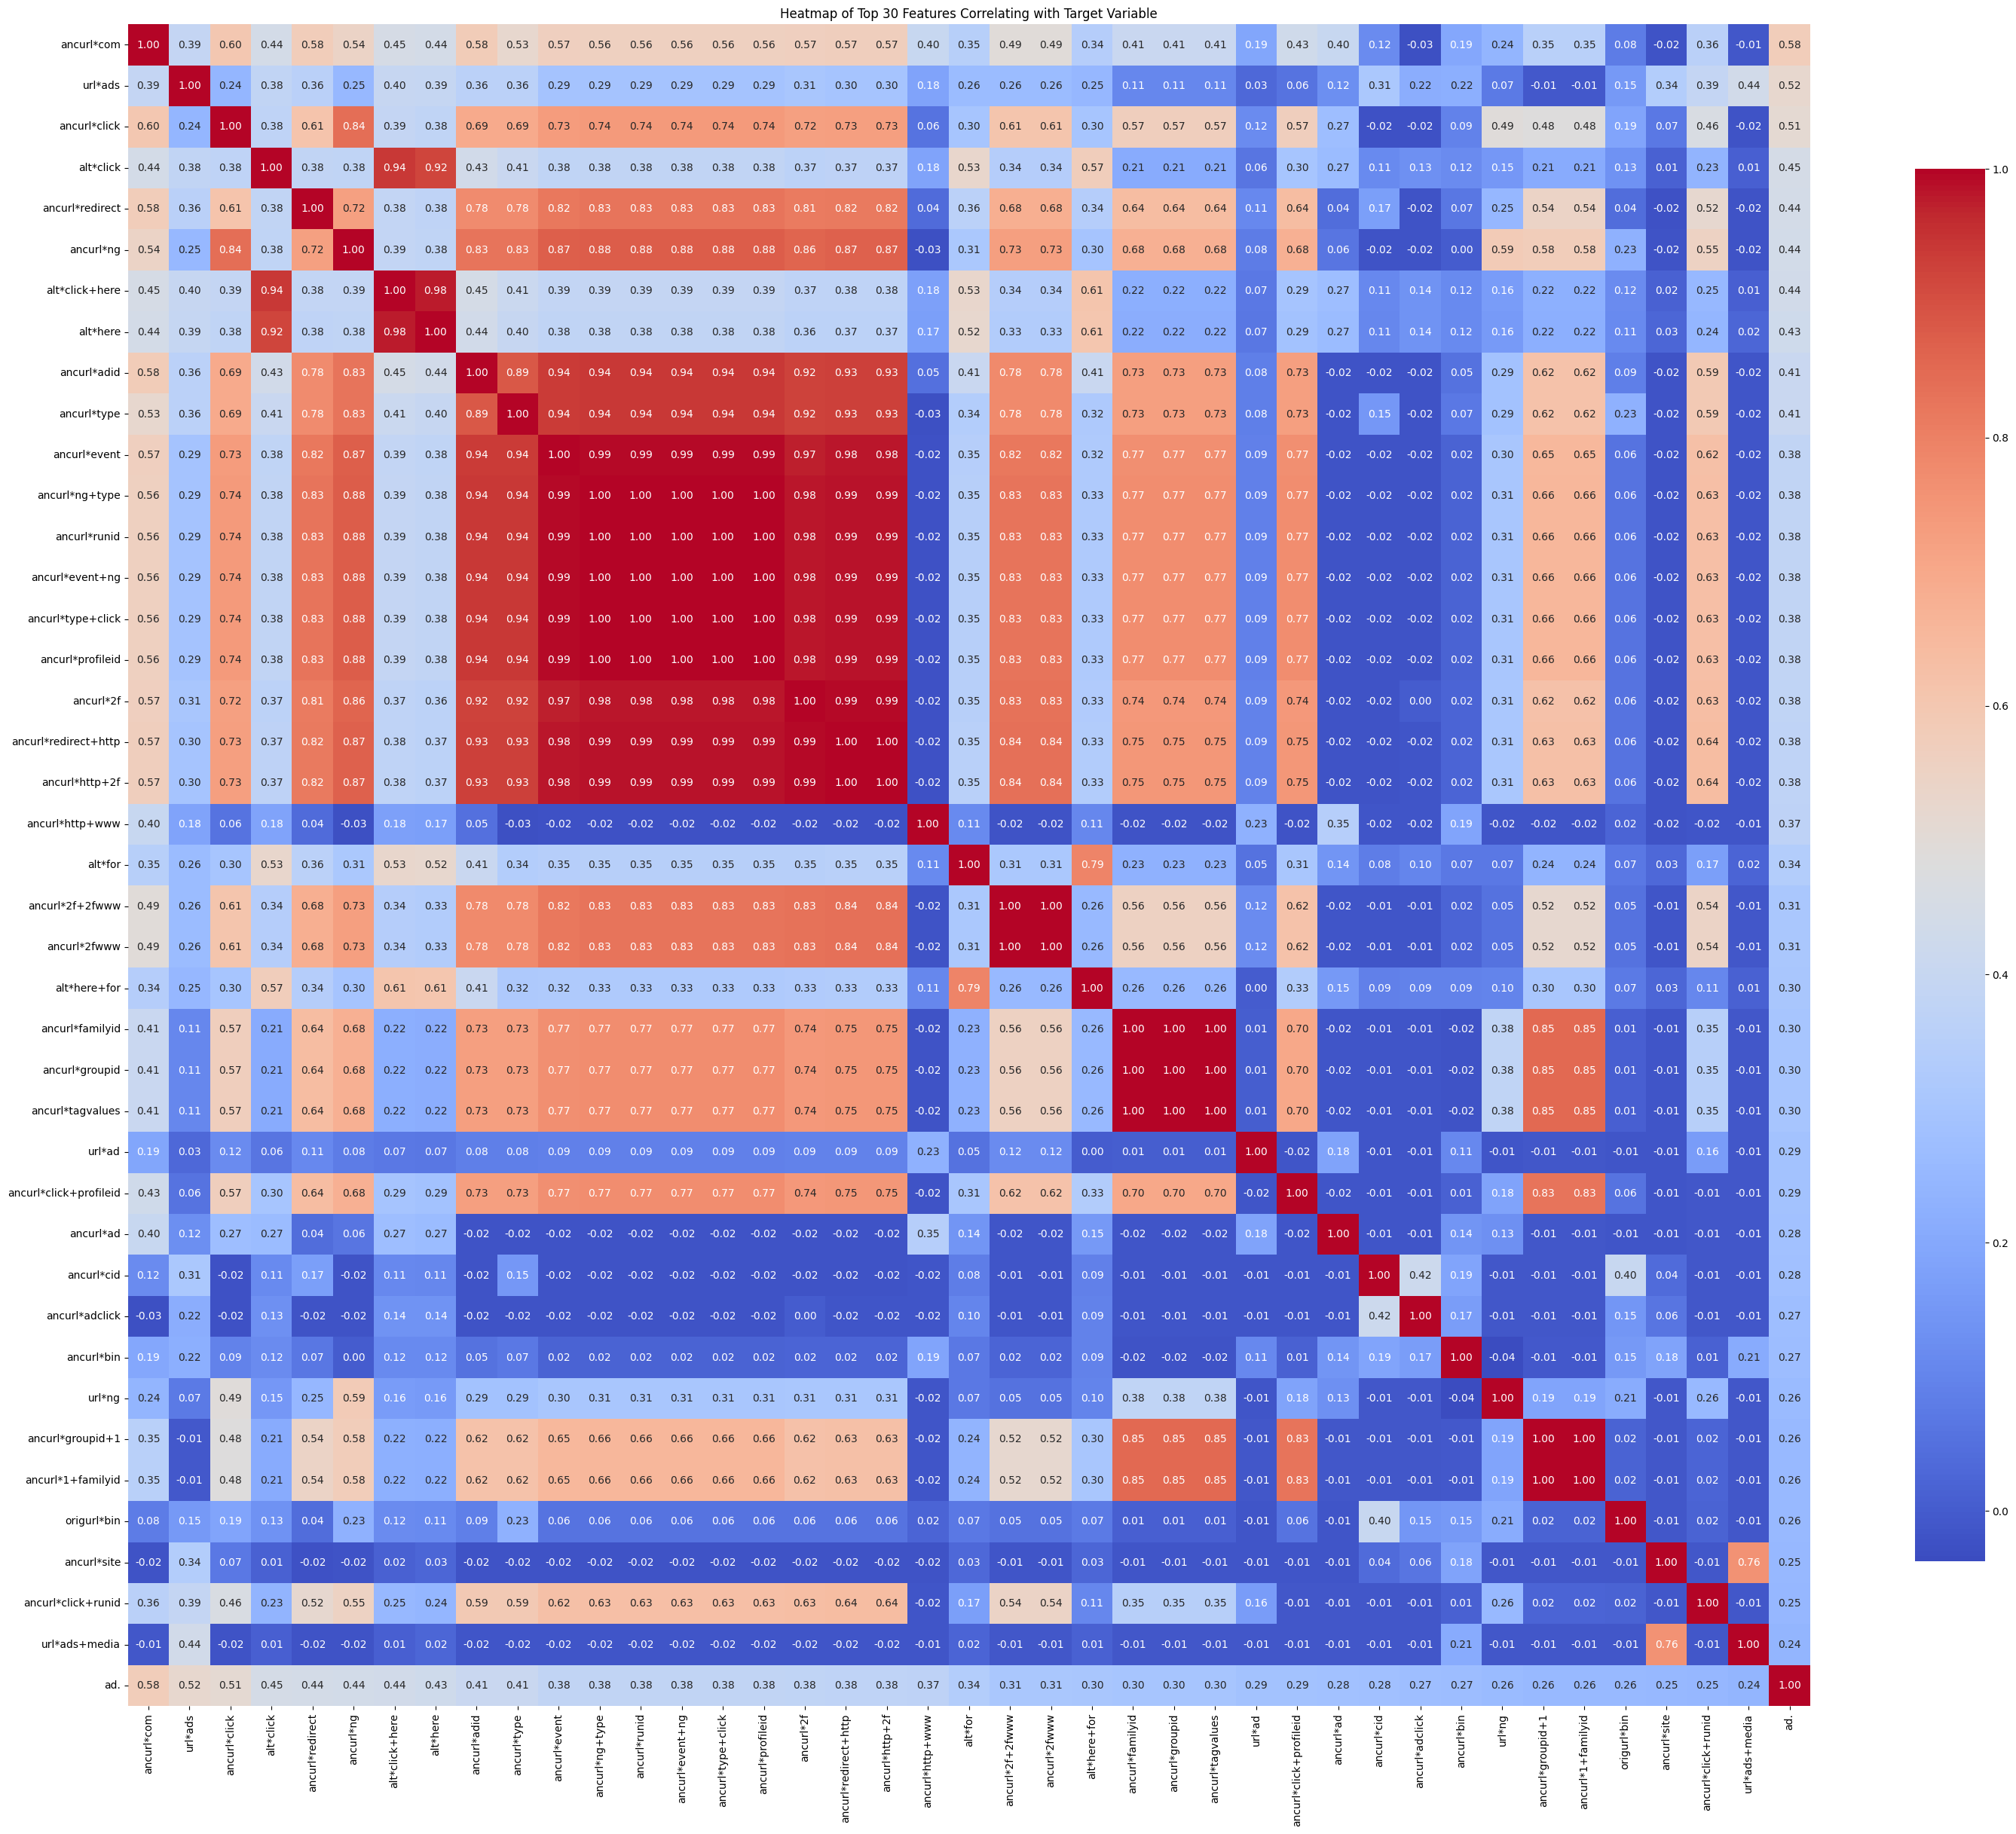

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract feature names and create a DataFrame
top_features = [feature for feature, _ in top_30_chi2_results]
top_features.append('ad.')  # Include target variable for correlation

# Subset the original DataFrame
subset_df = clean_df[top_features]

# Calculate correlation matrix for the subset
correlation_matrix = subset_df.corr()

# Create heatmap to show correlation between top features and target (useful for PCA later)
plt.figure(figsize=(36, 30))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Heatmap of Top 30 Features Correlating with Target Variable')
plt.show()

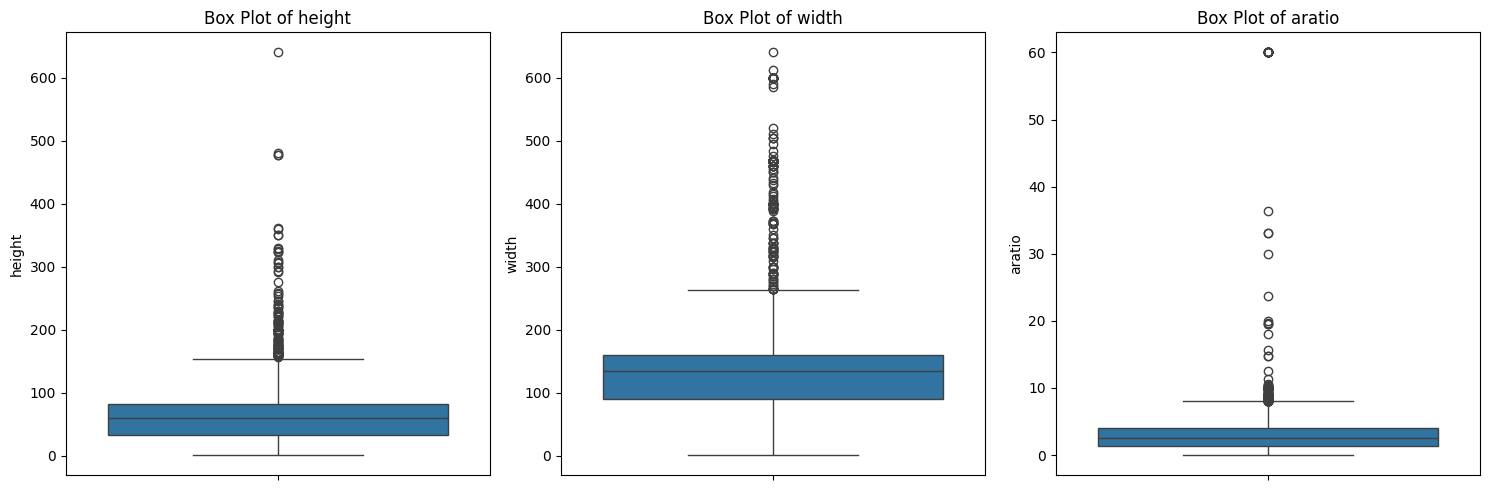

            height        width       aratio
count  3278.000000  3278.000000  3278.000000
mean     67.143953   152.970896     3.615193
std      47.666307   111.621817     5.174739
min       1.000000     1.000000     0.001500
25%      32.250000    90.000000     1.282550
50%      60.000000   135.000000     2.558669
75%      81.403509   159.592105     4.000000
max     640.000000   640.000000    60.000000


In [35]:
#STEP 4: Visualizing numerical and categorical data to find outliers

#numerical data visualization
# Select the first three numerical columns
numerical_columns = clean_df.columns[:3]

# Generate box plots for the first three numerical columns 
plt.figure(figsize=(15, 5))  # Adjust figure size as necessary
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(1, 3, i)  # Arrange plots in a single row
    sns.boxplot(data=clean_df, y=col)
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# Calculate summary statistics for the first three numerical columns
summary_statistics = clean_df[numerical_columns].describe()
print(summary_statistics)

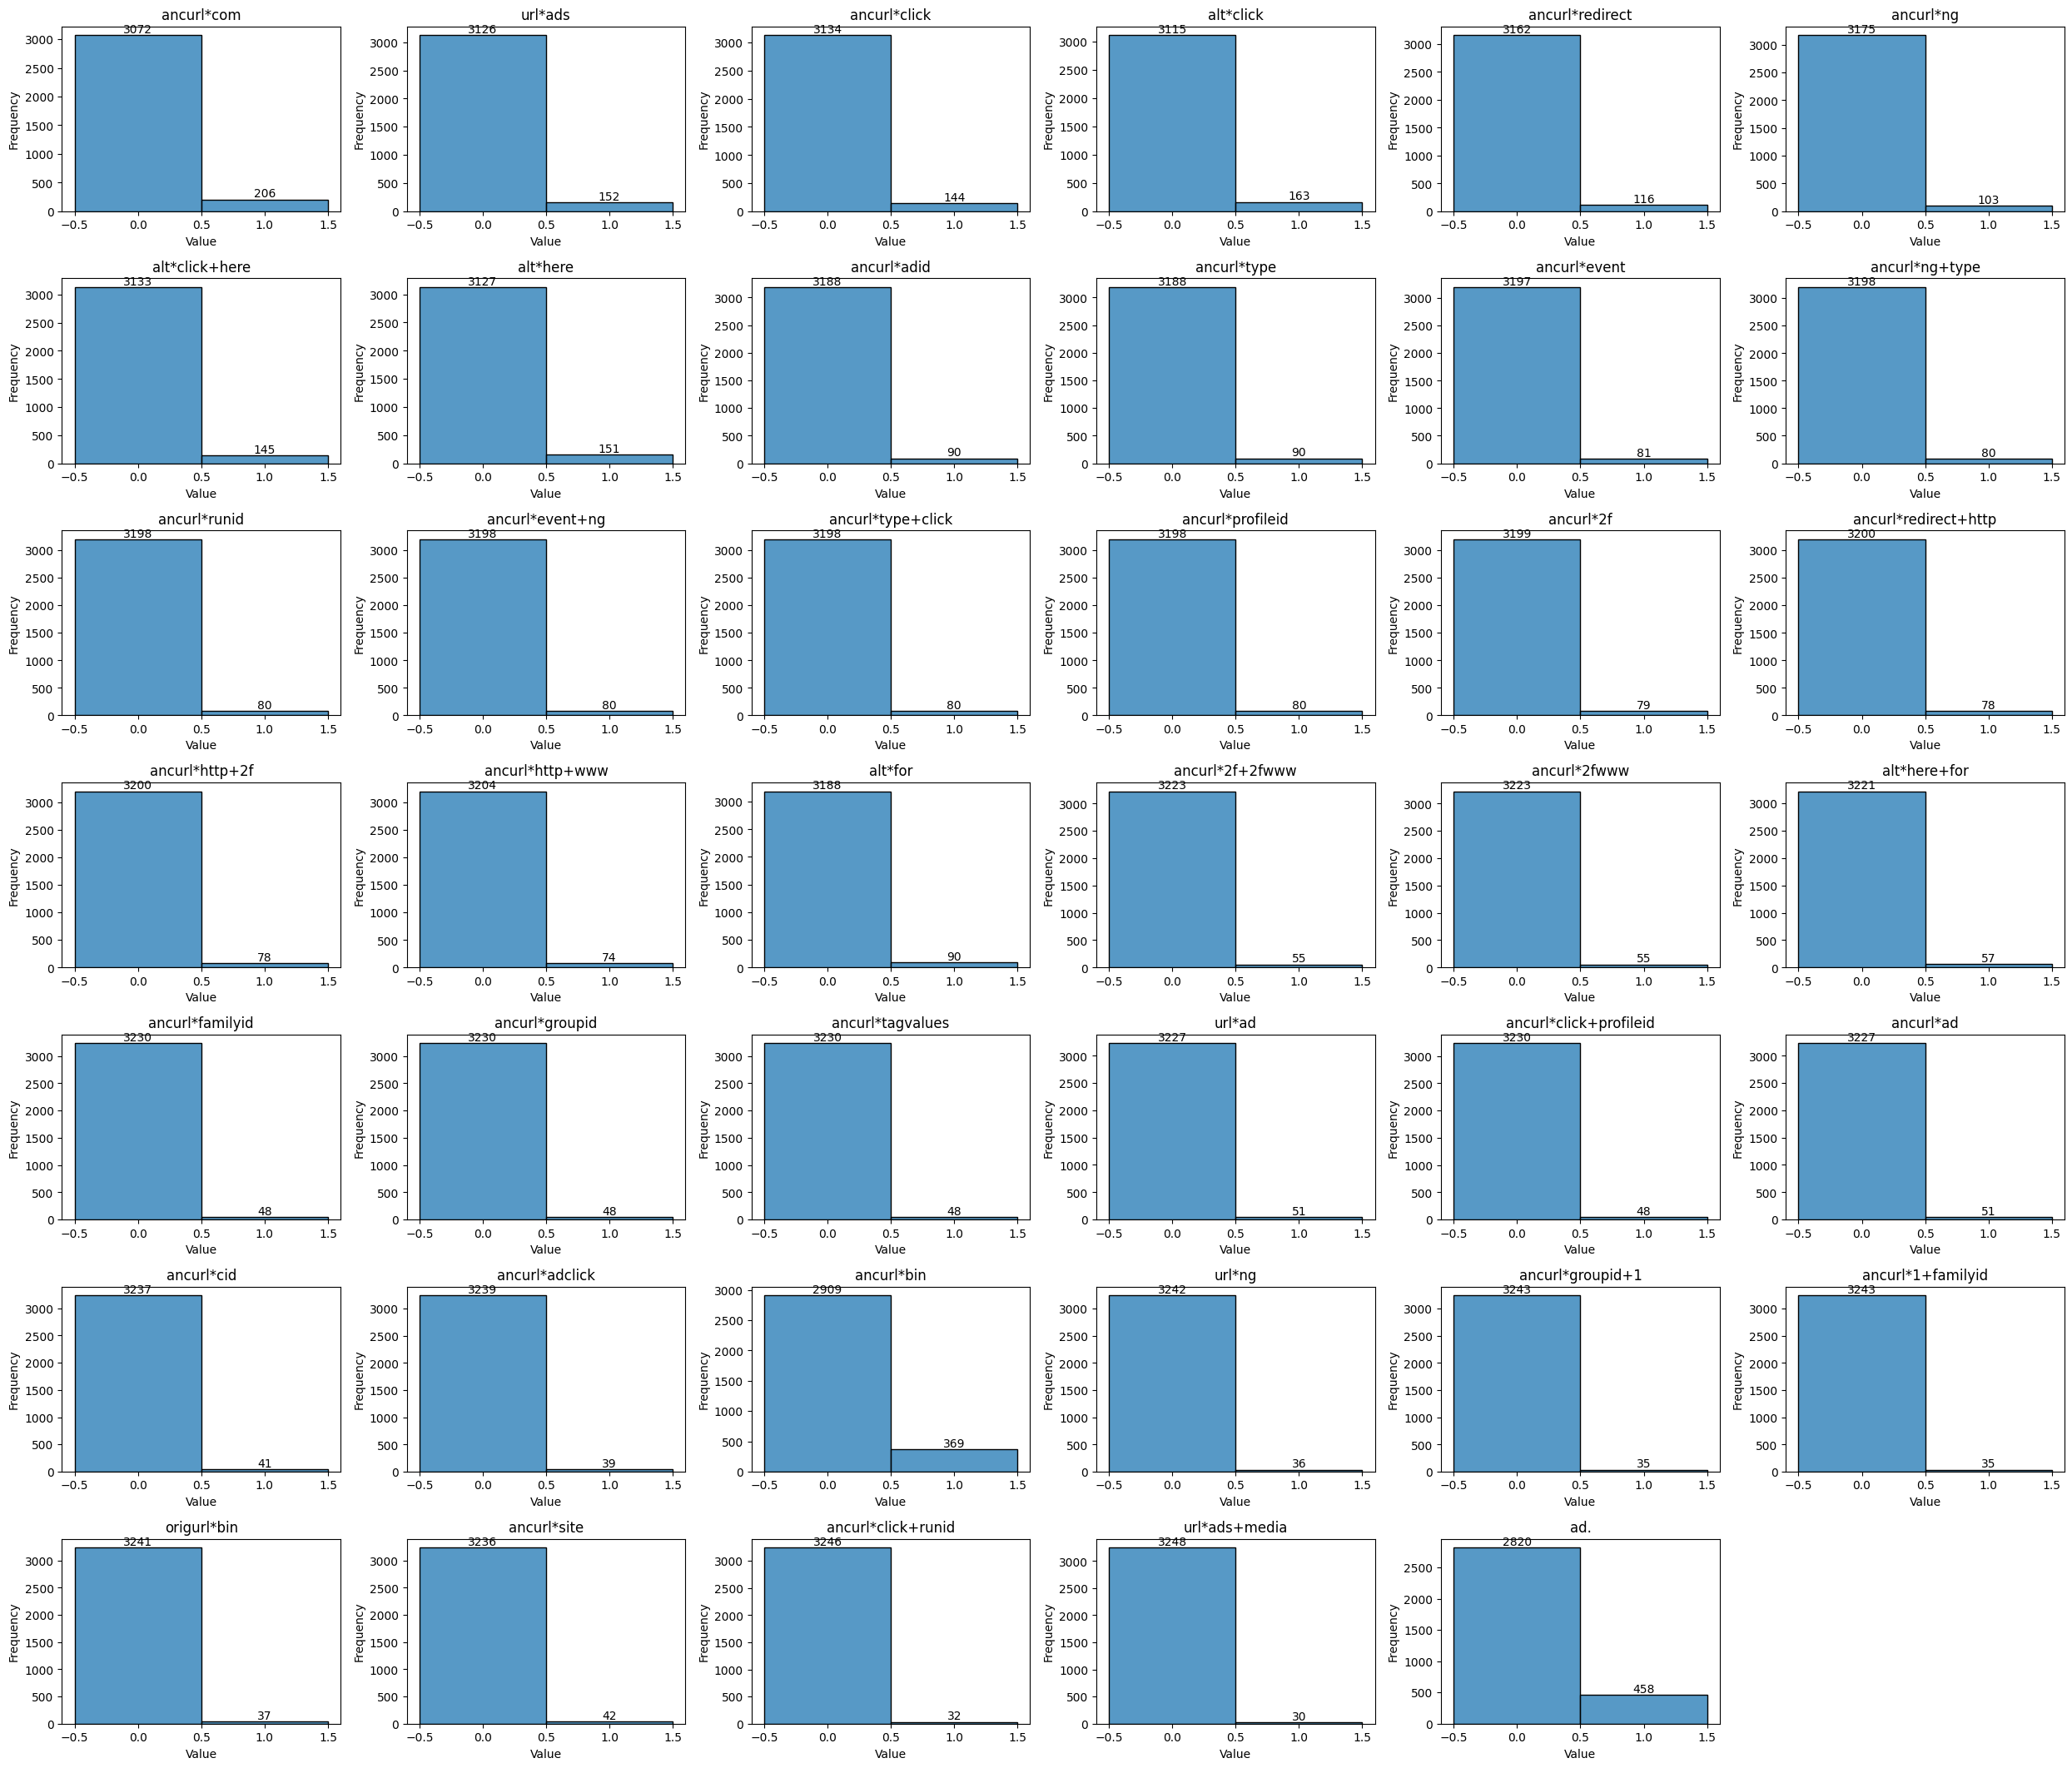

In [36]:
# Plot frequency distribution for each feature
plt.figure(figsize=(25, 30))  # Adjust figure size as necessary
for i, feature in enumerate(top_features, 1):
    plt.subplot(10, 6, i)  # Arrange plots in a 6x5 grid
    ax = sns.histplot(subset_df[feature], discrete=True) # Use histplot for continuous features
    
    # Add labels on top of the bars
    for container in ax.containers:
        ax.bar_label(container, label_type="edge")  # Set label position to 'edge' or 'center'
        
    plt.title(feature)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

#results show that there is a class imbalance with most categorical classes being 0 and less 1s.